# Prepare WiC dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from ax import optimize
import warnings
warnings.filterwarnings("ignore") 
import numpy as np
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy import stats
import timeit
import gensim

In [2]:
train = pd.read_csv('WIC_default_V4_emb.csv')
train

,Unnamed: 0.1,Unnamed: 0,keyword,POS,indices,sentence1,sentence2,human_label,freq,log2freq,default2,emb1,emb2
0,0,0,carry,V,2-1,You must carry your camping gear .,Sound carries well over water .,F,51781,15.660135,F,"[0.36855340003967285, 0.21410489082336426, 0.3...","[0.7610353827476501, 0.24949008226394653, 0.42..."
1,1,1,go,V,2-6,Messages must go through diplomatic channels .,Do you think the sofa will go through the door ?,F,1425686,20.443225,T,"[-0.0852346196770668, -0.13542714715003967, 0....","[-0.41432949900627136, -0.5187293291091919, -0..."
2,2,2,break,V,0-2,Break an alibi .,The wholesaler broke the container loads into ...,F,92773,16.501417,F,"[-0.09557104855775833, 0.6806768774986267, -0....","[0.6646726131439209, 0.3640071749687195, -0.33..."
3,3,3,cup,N,8-4,He wore a jock strap with a metal cup .,Bees filled the waxen cups with honey .,T,59218,15.853748,F,"[0.04534776136279106, 0.15553200244903564, -0....","[0.5837751626968384, 0.7275094985961914, 0.373..."
4,4,4,academy,N,1-2,The Academy of Music .,The French Academy .,F,8268,13.013323,T,"[0.6533669233322144, 0.41288065910339355, 0.14...","[0.38001948595046997, 0.5047792196273804, -0.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5409,5409,5409,krona,N,4-8,Piecas kronas — five krona .,Kronas kurss — the exchange rate of the krona .,T,20,4.321928,T,"[-0.338161438703537, -0.29280316829681396, -0....","[0.2160266935825348, -0.6211860775947571, 0.11..."
5410,5410,5410,conflict,N,3-1,The harder the conflict the more glorious the ...,The conflict between the government and the re...,T,6941,12.760928,T,"[-0.4126608669757843, -0.009200280532240868, 0...","[-0.23549480736255646, -0.05389336124062538, -..."
5411,5411,5411,answer,V,0-0,Answer the riddle .,Answer a question .,T,92806,16.501930,T,"[0.058757320046424866, 0.6233664155006409, 0.3...","[0.05365370213985443, 0.27401450276374817, -0...."
5412,5412,5412,play,V,0-0,Play the casinos in Trouville .,Play the races .,T,242591,17.888167,T,"[0.12210450321435928, 0.0381808802485466, 0.67...","[0.06764652580022812, -0.25057026743888855, 0...."


In [3]:
test = pd.read_csv('WIC_Dev_V1.csv')
test

,Unnamed: 0,index,keyword,POS,indices,sentence1,sentence2,human_label,freq,log2freq,default2,stop_word,context,emb1,emb2
0,0,0,board,N,2-2,Room and board .,He nailed boards across the windows .,F,40861,15.318437,F,NON_STOP,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...","[0.32379308342933655, -0.9409257769584656, 0.4...","[0.8021490573883057, 0.22980347275733948, 0.13..."
1,1,1,circulate,V,0-4,Circulate a rumor .,This letter is being circulated among the facu...,F,525,9.036174,F,NON_STOP,"[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...","[0.6982812881469727, -0.6266661286354065, 0.68...","[0.44260984659194946, -0.44674062728881836, 0...."
2,2,2,hook,V,0-1,Hook a fish .,"He hooked a snake accidentally , and was so sc...",T,5475,12.418643,T,NON_STOP,"[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...","[0.4487978518009186, -0.14455214142799377, -0....","[0.12538641691207886, -0.24529865384101868, -0..."
3,3,3,recreation,N,1-9,For recreation he wrote poetry and solved cros...,Drug abuse is often regarded as a form of recr...,T,899,9.812177,T,NON_STOP,"[0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, ...","[-0.15048642456531525, 0.3038761019706726, -0....","[0.2763870358467102, 0.2070009708404541, -0.31..."
4,4,4,domesticity,N,4-6,Making a hobby of domesticity .,A royal family living in unpretentious domesti...,F,215,7.748193,T,NON_STOP,"[0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...","[-0.2053181678056717, -0.12293358147144318, 0....","[-0.003427177667617798, 0.16879305243492126, 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,625,633,base,N,9-0,He told the painter that he wanted a yellow ba...,Bases include oxides and hydroxides of metals ...,F,42133,15.362663,F,NON_STOP,"[0, 0, 6, 2, 0, 6, 0, 0, 4, 0, 0, 0, 2, 4, 0, ...","[0.45744726061820984, -0.4049248695373535, -0....","[0.3912009298801422, 0.5014382600784302, -0.48..."
626,626,634,power,N,5-6,He needed a lot of power to hit the ball out o...,The mysterious presence of an evil power .,F,175763,17.423272,F,NON_STOP,"[0, 0, 6, 0, 0, 6, 0, 0, 2, 2, 0, 0, 2, 0, 0, ...","[0.3826950192451477, -0.36617594957351685, 0.1...","[0.4892788231372833, -0.4022475481033325, 0.13..."
627,627,635,portmanteau,N,8-5,` brunch ' is a well - known portmanteau .,` motel ' is a portmanteau word made by combin...,T,83,6.375039,T,NON_STOP,"[0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 8, 0, 0, ...","[0.0530611053109169, 0.35333138704299927, 0.31...","[0.2475951910018921, -0.03151725232601166, 0.4..."
628,628,636,promise,V,1-1,I promise you my best effort .,I promised somebody my time .,T,26983,14.719763,T,NON_STOP,"[0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 2, 0, ...","[1.0175503492355347, -0.18825414776802063, 0.6...","[0.9327632188796997, -0.9304642677307129, 0.28..."


In [15]:
plt.rcParams.update({'font.size': 20})

In [115]:
plt.rc('legend', fontsize=13.5)  

In [43]:
# frequency range plot
def freq_dis_plot(test_df, no_bin=10, title='train dataset'):
    max_freq = max(test_df['log2freq'])
    move = max_freq/no_bin
    x=[]
    y=[]
    for bin_no in range(no_bin):
        left = bin_no*move
        if bin_no != no_bin-1:
            right = left + move
        else:
            right = max_freq + move
        if bin_no==0:
            temp = test_df[(test_df['log2freq']>=left) & (test_df['log2freq']<=right)].reset_index()
        else:
            temp = test_df[(test_df['log2freq']>left) & (test_df['log2freq']<=right)].reset_index()
        x.append("{:.2f}".format(left) + '-' + "{:.2f}".format(right))
        y.append(len(temp))
    figure(figsize=(19, 10), dpi=80)
    plt.barh(x, y)
    for index, value in enumerate(y):
        plt.text(value, index,
                 str(value))
    plt.xlabel('Count')
    plt.ylabel('log2 frequency range')
    #plt.title('Log2 frequency range distribution of WiC '+title)
    plt.show()

In [17]:
# calculate predictions
def bin_prediction(test_df, adjust = 'None', no_bin = 10, m1=0.01, b1=15, m2=0.01, b2=15):
    # input = DataFrame
    # return label_bin, predict_bin i.e. [[1,1,0], [0,0,1], ..., [1,1,1]] VS [[1,1,1], [0,1,1], ..., [0,1,1]]
    max_freq = max(test_df['log2freq'])
    move = max_freq/no_bin
    label_bin = []
    predict_bin = []
    for bin_no in range(no_bin):
        left = bin_no*move
        if bin_no != no_bin-1:
            right = left + move
        else:
            right = max_freq + 100
        if bin_no==0:
            temp = test_df[(test_df['log2freq']>=left) & (test_df['log2freq']<=right)].reset_index()
        else:
            temp = test_df[(test_df['log2freq']>left) & (test_df['log2freq']<=right)].reset_index()
        temp_label = []
        temp_predict = []
        for index in range(len(temp)):
            if temp.iloc[index]['human_label'] == 'T':
                temp_label.append(1)
            else:
                temp_label.append(0)
            emb1 = torch.tensor([float(i) for i in temp.iloc[index]['emb1'][1:-2].split(',')])
            emb2 = torch.tensor([float(i) for i in temp.iloc[index]['emb2'][1:-2].split(',')])
            if adjust == 'None':
                cos = np.dot(emb1, emb2)/((np.linalg.norm(emb1)*np.linalg.norm(emb2)))
            elif adjust == 'Linear':
                freq = temp.iloc[index]['log2freq']
                alpha = 1+m1*(b1-freq)
                cos = np.dot(emb1, emb2)/((np.linalg.norm(emb1)*alpha)*(np.linalg.norm(emb2)*alpha))
            else: # word-type dependent adjustment
                freq = temp.iloc[index]['log2freq']
                if temp.iloc[index]['keyword'] not in gensim.parsing.preprocessing.STOPWORDS: # non-stop word
                    alpha = 1+m1*(b1-freq)
                else:
                    #b2=b1 ##########################################################################################
                    alpha = 1+m2*(b2-freq)
                cos = np.dot(emb1, emb2)/((np.linalg.norm(emb1)*alpha)*(np.linalg.norm(emb2)*alpha))
            if cos>= 0.5447465400847086:
                temp_predict.append(1)
            else:
                temp_predict.append(0)
        label_bin.append(temp_label)
        predict_bin.append(temp_predict)
    return label_bin, predict_bin

In [18]:
# return tn, fp, fn, tp
def confusion(label, predict):
    # input = 2 lists (label, predict) i.e. [1,1,1,1,0] VS [1,1,1,1,1]
    matrix = confusion_matrix(label, predict)
    if matrix.shape==(2,2):
        tn, fp, fn, tp = matrix.ravel()
    elif matrix.shape==(1,1): # i.e. [1,1,1] vs [1,1,1]
        if label[0]==1:
            tp = len(label)
            fp, fn, tn = 0,0,0
        else:
            tn = len(label)
            fp, fn, tp = 0,0,0
    return tn, fp, fn, tp

In [19]:
def matrix_values(tn, fp, fn, tp):
    # calculate UE, ACC, recall
    if (tp + fn) ==0:
        ue=0
        recall = 0
    else:
        ue = fn/ (tp + fn)
        recall = tp/(tp+fn)
    #if (tn + fp) ==0:
        #oe=0
    #else:
        #oe = fp/ (tn + fp)
    return ue, (tp+tn)/(tp+tn+fp+fn), recall

In [98]:
# underestimation plot
def plot_under(label_bin, predict_bin, title='default BERT'):
    # input = list of list for 10 bins
    UEs = []
    recalls = []
    acc=[]
    # OEs = []
    tp_fn = []
    tp_fp = []
    for i in range(len(label_bin)):
        tn, fp, fn, tp = confusion(label_bin[i], predict_bin[i])
        UEs.append(matrix_values(tn, fp, fn, tp)[0])
        recalls.append(matrix_values(tn, fp, fn, tp)[2])
        acc.append(matrix_values(tn, fp, fn, tp)[1])
        tp_fn.append((tp+fn)/(tp+tn+fp+fn))
        tp_fp.append((tp+fp)/(tp+tn+fp+fn))
    acc = ["{0:.2%}".format(i) for i in acc]
    figure(figsize=(8, 6), dpi=80)
    N = 10
    x=[j for j in range(1,11)]
    ind = np.arange(N) 
    width = 0.35
    plt.bar(ind, UEs, width, label='Underestimation')
    plt.bar(ind + width, recalls, width, label='Recall')
    plt.ylabel('%')
    plt.xlabel('Word Frequency Percentile (10 bins)')
    #plt.title('Cosine similarity underestimation and recall of '+title)
    plt.xticks(ind + width/2, x)
    plt.legend(loc='best')
    plt.show()
    
    figure(figsize=(8, 6), dpi=80)
    N = 10
    x=[j for j in range(1,11)]
    ind = np.arange(N) 
    width = 0.35
    plt.bar(ind, tp_fn, width, label='Human labelled')
    plt.bar(ind + width, tp_fp, width, label='Cosine prediction')
    plt.ylabel('% labelled as \"same meaning\"')
    plt.xlabel('Word Frequency Percentile (10 bins)')
    #plt.title('Model prediction and human labelled comparison (positive class) of '+title)
    plt.xticks(ind + width/2, x)
    plt.legend(loc='best')
    plt.show()

In [46]:
# cf_matrix plot
def plot_confusion(cf_matrix, title = 'Confusion matrix of default BERT\n\n'):
    group_names = ['True Negative','False Positive','False Negative','True Positive']  # names tag in the matrix
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]  # values of the matrix
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]  # percentage of values
    # labels
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    # create heatmap
    figure(figsize=(8, 6), dpi=80)
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    #ax.set_title(title);
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    # ticket labels
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    # display confusion matrix
    print()
    plt.show()
    
    # print UE, OE, accuracy
    tn, fp, fn, tp = cf_matrix.ravel()
    print('Overall cosine similarity underestimation: ', "{:.3f}".format(fn/ (tp + fn)))
    #print('Overall cosine similarity overestimation: ', "{:.3f}".format(fp/ (tn + fp)))
    print('Overall recall: ', "{:.3f}".format(tp/ (tp + fn)))
    print('Overall accuracy: ', "{:.4f}".format((tn+tp)/(tn+tp+fn+fp)))

In [63]:
# cosine similarity plot
def cosine_sim_plot(test_df, adjust = 'None', title = 'Cosine similarity plot of default BERT', m1=0.01, b1=15, m2=0.01, b2=15):
    figure(figsize=(8, 6), dpi=80)
    s=3
    temp_t = test_df[test_df['human_label']=='T'].reset_index()
    x1=temp_t['log2freq']
    y1=[]
    for index in range(len(temp_t)):
        emb1 = torch.tensor([float(i) for i in temp_t.iloc[index]['emb1'][1:-2].split(',')])
        emb2 = torch.tensor([float(i) for i in temp_t.iloc[index]['emb2'][1:-2].split(',')])
        if adjust == 'None':
            y1.append(np.dot(emb1, emb2)/((np.linalg.norm(emb1)*np.linalg.norm(emb2))))
        elif adjust == 'Linear':
            freq = temp_t.iloc[index]['log2freq']
            alpha = 1+m*(b-freq)
            cos = np.dot(emb1, emb2)/((np.linalg.norm(emb1)*alpha)*(np.linalg.norm(emb2)*alpha))
            y1.append(cos)
        else: # word-type dependent adjustment
            freq = temp_t.iloc[index]['log2freq']
            if temp_t.iloc[index]['keyword'] not in gensim.parsing.preprocessing.STOPWORDS:
                alpha = 1+m1*(b1-freq)
            else:
                #b2=b1 ##########################################################################################
                alpha = 1+m2*(b2-freq)
            cos = np.dot(emb1, emb2)/((np.linalg.norm(emb1)*alpha)*(np.linalg.norm(emb2)*alpha))
            y1.append(cos)
    res1 = stats.linregress(x1, y1)
    plt.scatter(x1,y1, s=s)
    plt.plot(x1, [res1.slope*j + res1.intercept for j in x1], label='Same')

    temp_f = test_df[test_df['human_label']=='F'].reset_index()
    x2=temp_f['log2freq']
    y2=[]
    for index in range(len(temp_f)):
        emb1 = torch.tensor([float(i) for i in temp_f.iloc[index]['emb1'][1:-2].split(',')])
        emb2 = torch.tensor([float(i) for i in temp_f.iloc[index]['emb2'][1:-2].split(',')])
        if adjust == 'None':
            y2.append(np.dot(emb1, emb2)/((np.linalg.norm(emb1)*np.linalg.norm(emb2))))
        elif adjust == 'Linear':
            freq = temp_f.iloc[index]['log2freq']
            alpha = 1+m*(b-freq)
            cos = np.dot(emb1, emb2)/((np.linalg.norm(emb1)*alpha)*(np.linalg.norm(emb2)*alpha))
            y2.append(cos)
        else: # word-type depemdent adjustment
            freq = temp_f.iloc[index]['log2freq']
            if temp_f.iloc[index]['keyword'] not in gensim.parsing.preprocessing.STOPWORDS:
                alpha = 1+m1*(b1-freq)
            else:
                #b2=b1 ##########################################################################################
                alpha = 1+m2*(b2-freq)
            cos = np.dot(emb1, emb2)/((np.linalg.norm(emb1)*alpha)*(np.linalg.norm(emb2)*alpha))
            y2.append(cos)
    res2 = stats.linregress(x2, y2)
    plt.scatter(x2,y2, s=s)
    plt.plot(x2, [res2.slope*j + res2.intercept for j in x2], label='Different')
    #plt.title(title)
    plt.xlabel('log2 frequency')
    plt.ylabel('cosine similarity')
    plt.legend()
    plt.show()

    print('Same meaning stats: ')
    print(f"The Pearson correlation coefficient: {res1.rvalue:.6f}")
    print(f"The p-value (<0.05 to reject null hypothesis): {res1.pvalue:.6f}")
    print(stats.spearmanr(x1, y1))
    print('slope: ', res1.slope, '(' + 'cosine similarity/' + 'log2-frequency)')
    print('#'*50)
    print('Different meaning stats: ')
    print(f"The Pearson correlation coefficient: {res2.rvalue:.6f}")
    print(f"The p-value (<0.05 to reject null hypothesis): {res2.pvalue:.6f}")
    print(stats.spearmanr(x2, y2))
    print('slope: ', res2.slope, '(' + 'cosine similarity/' + 'log2-frequency)')

In [81]:
# cosine similarity comparison plot
def cosine_sim_same_plot(test_df, title = 'Cosine similarity plot of default BERT and adjusted BERT', m1=0.01, b1=15, m2=0.01, b2=15):
    figure(figsize=(8, 6), dpi=80)
    s=3
    temp_t = test_df[test_df['human_label']=='T'].reset_index()
    x1=temp_t['log2freq']
    y1=[]
    ay1=[]
    for index in range(len(temp_t)):
        emb1 = torch.tensor([float(i) for i in temp_t.iloc[index]['emb1'][1:-2].split(',')])
        emb2 = torch.tensor([float(i) for i in temp_t.iloc[index]['emb2'][1:-2].split(',')])
        y1.append(np.dot(emb1, emb2)/((np.linalg.norm(emb1)*np.linalg.norm(emb2))))
        freq = temp_t.iloc[index]['log2freq']
        if temp_t.iloc[index]['keyword'] not in gensim.parsing.preprocessing.STOPWORDS:
            alpha = 1+m1*(b1-freq)
        else:
                #b2=b1 ##########################################################################################
            alpha = 1+m2*(b2-freq)
        cos = np.dot(emb1, emb2)/((np.linalg.norm(emb1)*alpha)*(np.linalg.norm(emb2)*alpha))
        ay1.append(cos)
    res1 = stats.linregress(x1, y1)
    plt.scatter(x1,y1, s=s)
    plt.plot(x1, [res1.slope*j + res1.intercept for j in x1], label='Same (original)')
    resa1 = stats.linregress(x1, ay1)
    plt.scatter(x1,ay1, s=s)
    plt.plot(x1, [resa1.slope*j + resa1.intercept for j in x1], label='Same (discounted)')

    temp_f = test_df[test_df['human_label']=='F'].reset_index()
    x2=temp_f['log2freq']
    y2=[]
    ay2=[]
    for index in range(len(temp_f)):
        emb1 = torch.tensor([float(i) for i in temp_f.iloc[index]['emb1'][1:-2].split(',')])
        emb2 = torch.tensor([float(i) for i in temp_f.iloc[index]['emb2'][1:-2].split(',')])
        y2.append(np.dot(emb1, emb2)/((np.linalg.norm(emb1)*np.linalg.norm(emb2))))
        freq = temp_f.iloc[index]['log2freq']
        if temp_f.iloc[index]['keyword'] not in gensim.parsing.preprocessing.STOPWORDS:
            alpha = 1+m1*(b1-freq)
        else:
                #b2=b1 ##########################################################################################
            alpha = 1+m2*(b2-freq)
        cos = np.dot(emb1, emb2)/((np.linalg.norm(emb1)*alpha)*(np.linalg.norm(emb2)*alpha))
        ay2.append(cos)
    res2 = stats.linregress(x2, y2)
    plt.scatter(x2,y2, s=s)
    plt.plot(x2, [res2.slope*j + res2.intercept for j in x2], label='Different (original)')
    resa2 = stats.linregress(x2, ay2)
    plt.scatter(x2,ay2, s=s)
    plt.plot(x2, [resa2.slope*j + resa2.intercept for j in x2], label='Different (discounted)')
    #plt.title(title)
    plt.xlabel('log2 frequency')
    plt.ylabel('cosine similarity')
    plt.legend()
    plt.show()

    print('Same meaning stats (default): ')
    print(f"The Pearson correlation coefficient: {res1.rvalue:.6f}")
    print(f"The p-value (<0.05 to reject null hypothesis): {res1.pvalue:.6f}")
    print(stats.spearmanr(x1, y1))
    print('slope: ', res1.slope, '(' + 'cosine similarity/' + 'log2-frequency)')
    print('#'*50)
    print('Different meaning stats (default): ')
    print(f"The Pearson correlation coefficient: {res2.rvalue:.6f}")
    print(f"The p-value (<0.05 to reject null hypothesis): {res2.pvalue:.6f}")
    print(stats.spearmanr(x2, y2))
    print('slope: ', res2.slope, '(' + 'cosine similarity/' + 'log2-frequency)')
    print('#'*50)
    print('#'*50)
    print('Same meaning stats (adjusted): ')
    print(f"The Pearson correlation coefficient: {resa1.rvalue:.6f}")
    print(f"The p-value (<0.05 to reject null hypothesis): {resa1.pvalue:.6f}")
    print(stats.spearmanr(x1, ay1))
    print('slope: ', resa1.slope, '(' + 'cosine similarity/' + 'log2-frequency)')
    print('#'*50)
    print('Different meaning stats (adjusted): ')
    print(f"The Pearson correlation coefficient: {resa2.rvalue:.6f}")
    print(f"The p-value (<0.05 to reject null hypothesis): {resa2.pvalue:.6f}")
    print(stats.spearmanr(x2, ay2))
    print('slope: ', resa2.slope, '(' + 'cosine similarity/' + 'log2-frequency)')
    print()
    print('#'*50)
    print('Percent reduction of slope from default to adjusted: 100*[(abs(default)-abs(adjusted))/abs(default)]')
    print()
    print('Same meaning: ', 100*((abs(res1.slope)-abs(resa1.slope))/abs(res1.slope)))
    print('Different meaning: ', 100*((abs(res2.slope)-abs(resa2.slope))/abs(res2.slope)))

In [87]:
# improvement plot
def comparison_plot(label_bin_default, predict_bin_default, label_bin_adjusted, predict_bin_adjusted):
    # input = list of list for 10 bins
    UEs0 = []
    recalls0 = []
    tp_fn=[]
    tp_fp0 = []
    for i in range(len(label_bin_default)):
        tn, fp, fn, tp = confusion(label_bin_default[i], predict_bin_default[i])
        UEs0.append(matrix_values(tn, fp, fn, tp)[0]) 
        recalls0.append(matrix_values(tn, fp, fn, tp)[2])
        tp_fn.append((tp+fn)/(tp+tn+fp+fn))
        tp_fp0.append((tp+fp)/(tp+tn+fp+fn))
        
    UEs1 = []
    recalls1 = []
    tp_fp1 = []
    for i in range(len(label_bin_adjusted)):
        tn, fp, fn, tp = confusion(label_bin_adjusted[i], predict_bin_adjusted[i])
        UEs1.append(matrix_values(tn, fp, fn, tp)[0])
        recalls1.append(matrix_values(tn, fp, fn, tp)[2])
        tp_fp1.append((tp+fp)/(tp+tn+fp+fn))
    
    N = 10
    x=[j for j in range(1,11)]
    ind = np.arange(N) 
    width = 0.35
    figure(figsize=(16, 12), dpi=80)
    
    plt.subplot(2, 2, 1)
    plt.bar(ind, UEs0, width, label='default BERT')
    plt.bar(ind + width, UEs1, width, label='adjusted BERT')
    plt.ylabel('%')
    plt.xlabel('frequency bin')
    #plt.title('Cosine similarity underestimation comparison')
    plt.xticks(ind + width/2, x)
    plt.legend(loc='best')
    
    plt.subplot(2, 2, 2)
    plt.bar(ind, recalls0, width, label='default BERT')
    plt.bar(ind + width, recalls1, width, label='adjusted BERT')
    plt.ylabel('%')
    plt.xlabel('frequency bin')
    #plt.title('Recall comparison')
    plt.xticks(ind + width/2, x)
    plt.legend(loc='best')
    #print() ######################################################################
    
    plt.subplot(2, 2, 3)
    plt.bar(x, np.array(UEs0)-np.array(UEs1))
    plt.ylabel('difference')
    plt.xlabel('frequency bin')
    #plt.title('Cosine similarity underestimation improvement')
    plt.xticks(x)
    
    plt.subplot(2, 2, 4)
    plt.bar(x, np.array(recalls1)-np.array(recalls0))
    plt.ylabel('difference')
    plt.xlabel('frequency bin')
    #plt.title('Recall improvement')
    plt.xticks(x)
    print() #########################################################################
    
    plt.show()
    
    # (UE, recall, acc)
    total_label_bin_default = [item for sublist in label_bin_default for item in sublist]
    total_predict_bin_default = [item for sublist in predict_bin_default for item in sublist]
    tn, fp, fn, tp = confusion(total_label_bin_default, total_predict_bin_default)
    UE_default = matrix_values(tn, fp, fn, tp)[0]
    recall_default = matrix_values(tn, fp, fn, tp)[2]
    acc_default = matrix_values(tn, fp, fn, tp)[1]
    
    total_label_bin_adjusted = [item for sublist in label_bin_adjusted for item in sublist]
    total_predict_bin_adjusted = [item for sublist in predict_bin_adjusted for item in sublist]
    tn, fp, fn, tp = confusion(total_label_bin_adjusted, total_predict_bin_adjusted)
    UE_adjusted = matrix_values(tn, fp, fn, tp)[0]
    recall_adjusted = matrix_values(tn, fp, fn, tp)[2]
    acc_adjusted = matrix_values(tn, fp, fn, tp)[1]
    
    print()
    print('Cosine similarity underestimation (default, adjusted): ',
          '('+"{:.3f}".format(UE_default)+', '+"{:.3f}".format(UE_adjusted)+')')
    print('% cosine similarity underestimation improvement: ', "{:.3f}".format(100*(UE_default-UE_adjusted)/UE_default), '%')
    print('Recall (default, adjusted): ',
          '('+"{:.3f}".format(recall_default)+', '+"{:.3f}".format(recall_adjusted)+')')
    print('% recall improvement: ', "{:.3f}".format(100*(recall_adjusted-recall_default)/recall_default), '%')
    print('Accuracy (default, adjusted): ',
          '('+"{:.3f}".format(acc_default)+', '+"{:.3f}".format(acc_adjusted)+')')
    print('% accuracy improvement: ', "{:.3f}".format(100*(acc_adjusted-acc_default)/acc_default), '%')
    print()
    
    # 3 bars plot
    figure(figsize=(8, 6), dpi=80)
    N = 10
    x=[j for j in range(1,11)]
    ind = np.arange(N) 
    width = 0.25
    plt.bar(ind - width/2, tp_fn, width, label='Human labelled')
    plt.bar(ind+width/2 , tp_fp0, width, label='Cosine prediction (original)')
    plt.bar(ind + width+width/2, tp_fp1, width, label='Predicted positive (discounted)')
    plt.ylabel('% labelled as \"same meaning\"')
    plt.xlabel('Word Frequency Percentile (10 bins)')
    #plt.title('Model prediction and human labelled comparison (positive class)')
    plt.xticks(ind + width/2, x)
    plt.legend(loc='best')
    plt.show()

# Frequency range distribution plot

## train dataset

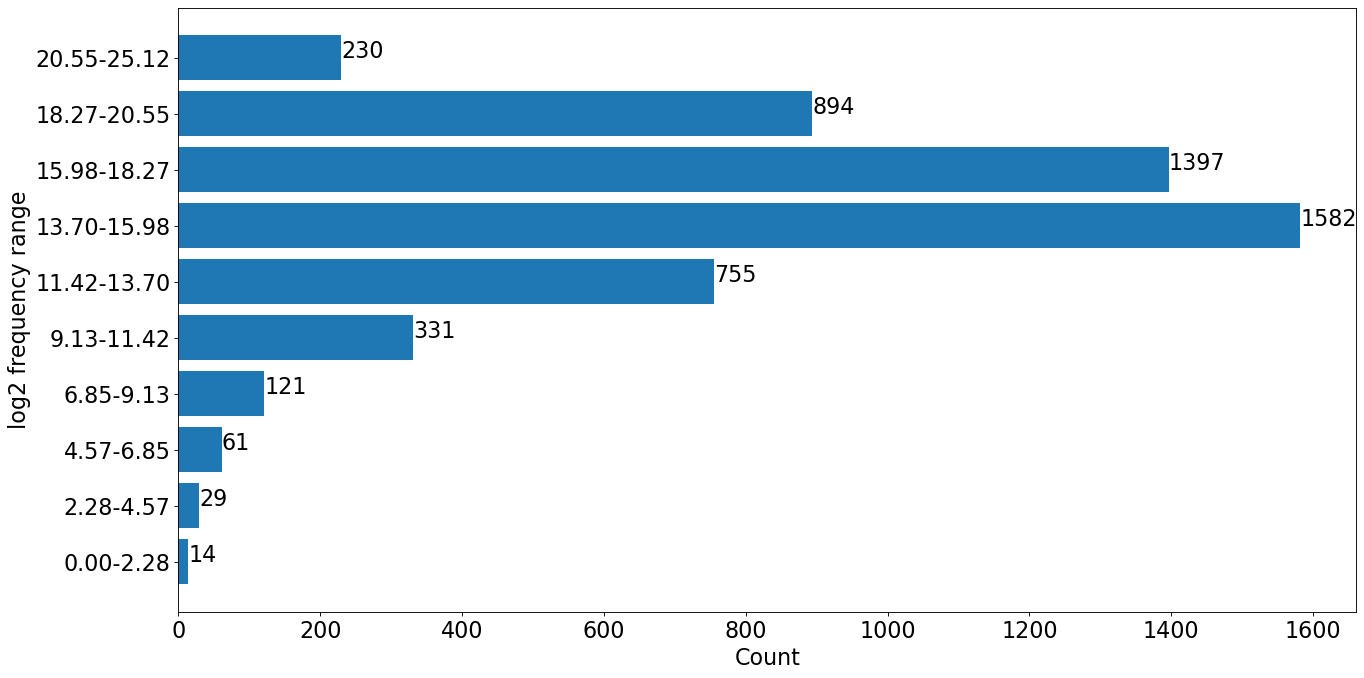

In [44]:
freq_dis_plot(test_df=train, no_bin=10)

## test dataset

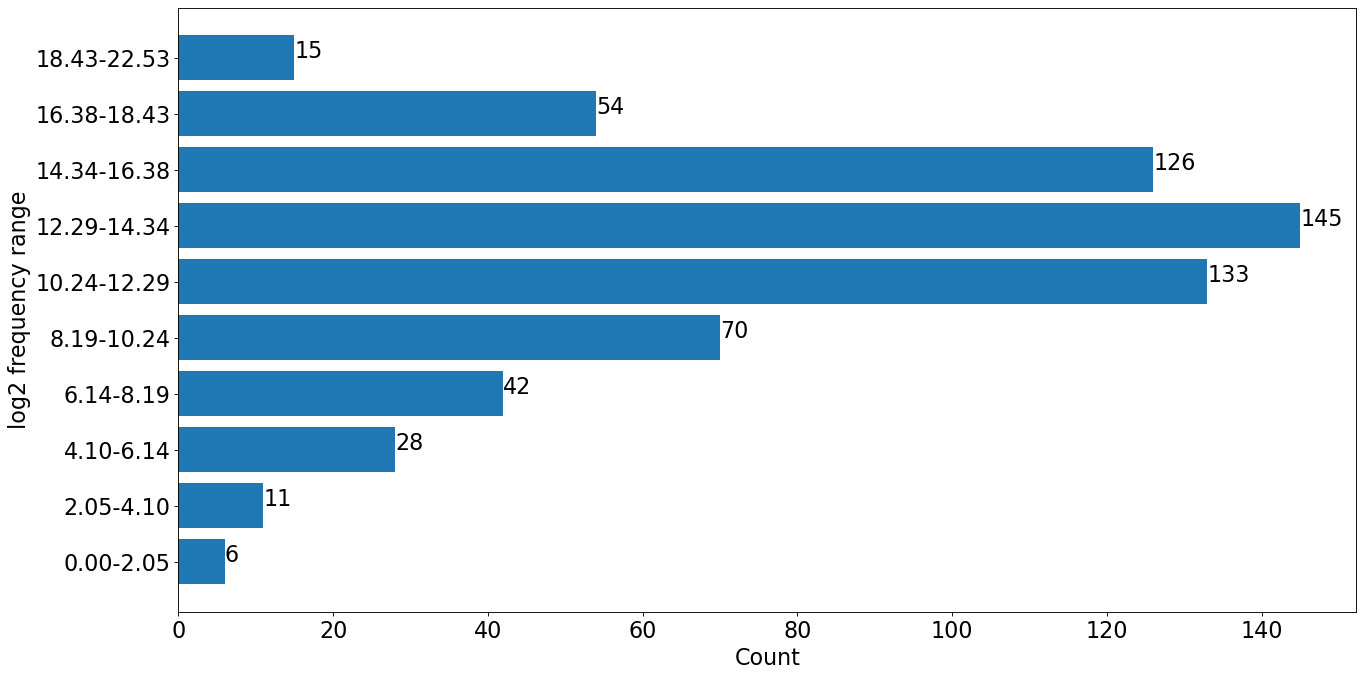

In [45]:
freq_dis_plot(test_df=test, no_bin=10, title = 'test dataset')

# Default BERT on train dataset

In [95]:
label_bin_default, predict_bin_default = bin_prediction(train, adjust = 'None', no_bin = 10)

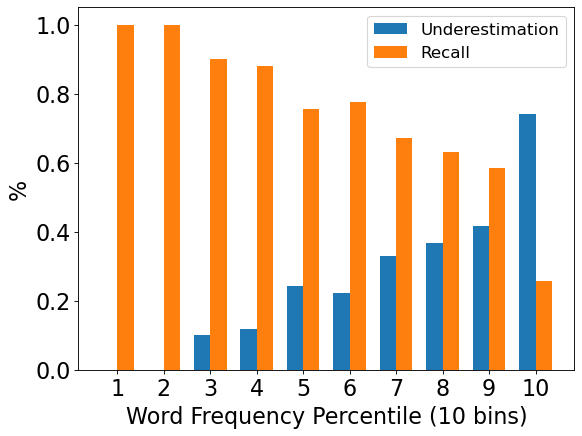

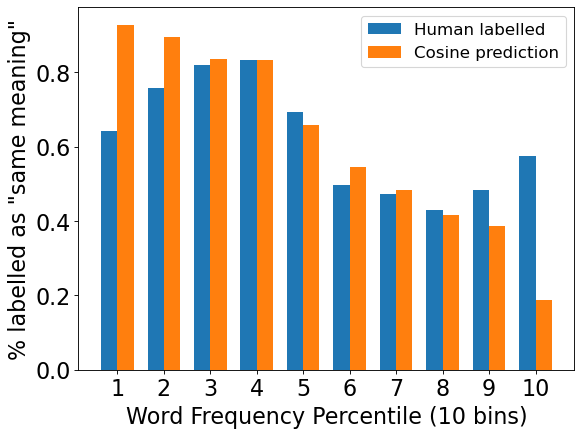

In [99]:
plot_under(label_bin_default, predict_bin_default, title='default BERT')

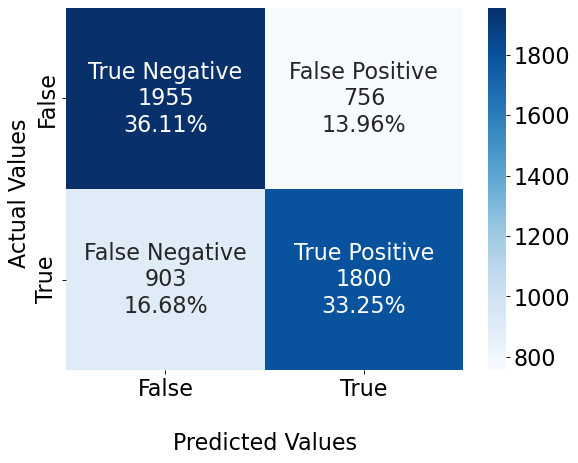

Overall cosine similarity underestimation:  0.334
Overall recall:  0.666
Overall accuracy:  0.6936


In [97]:
total_label_bin = [item for sublist in label_bin_default for item in sublist]
total_predict_bin = [item for sublist in predict_bin_default for item in sublist]
cf_matrix = confusion_matrix(total_label_bin, total_predict_bin)
plot_confusion(cf_matrix)

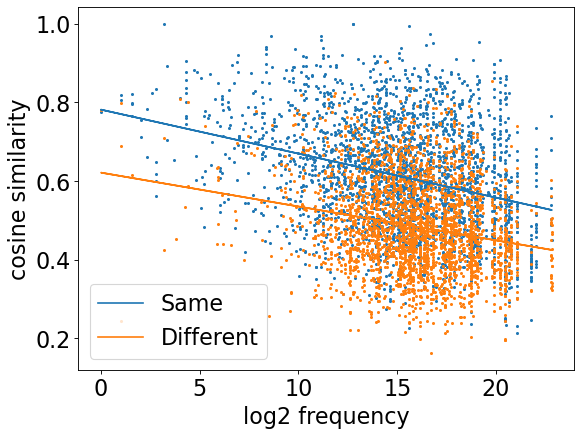

Same meaning stats: 
The Pearson correlation coefficient: -0.300086
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=-0.27353553049681806, pvalue=1.3633951570180686e-47)
slope:  -0.011193863182394372 (cosine similarity/log2-frequency)
##################################################
Different meaning stats: 
The Pearson correlation coefficient: -0.212538
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=-0.18568002883442905, pvalue=1.8762189241520593e-22)
slope:  -0.008618049895546273 (cosine similarity/log2-frequency)


In [67]:
cosine_sim_plot(train, adjust = 'None', title = 'Cosine similarity plot of default BERT')

# Default BERT on test dataset

In [100]:
label_bin_default, predict_bin_default = bin_prediction(test, adjust = 'None', no_bin = 10)

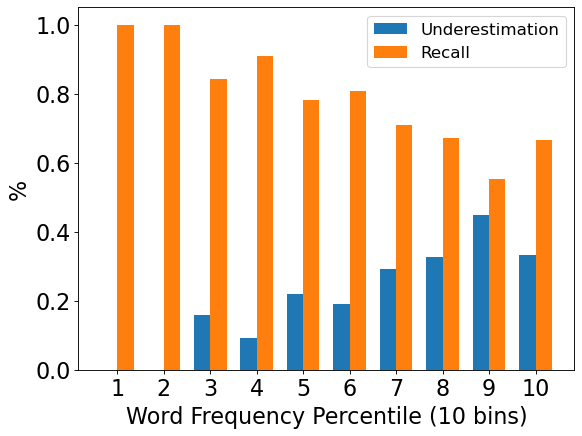

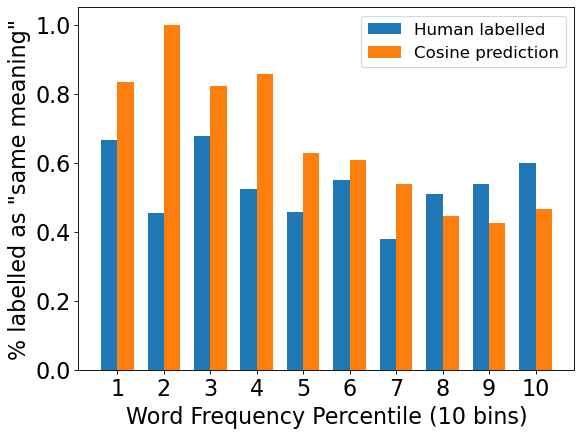

In [102]:
plot_under(label_bin_default, predict_bin_default, title='default BERT')

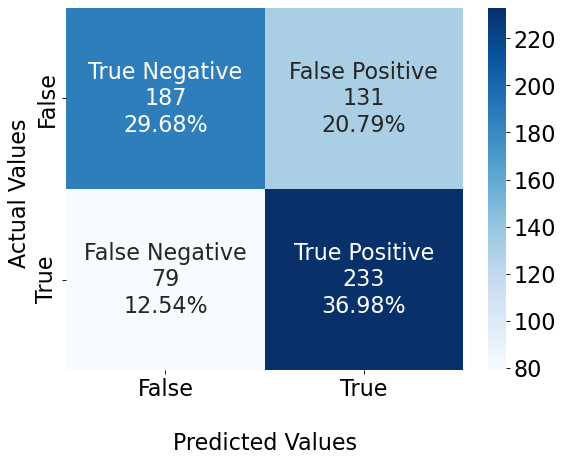

Overall cosine similarity underestimation:  0.253
Overall recall:  0.747
Overall accuracy:  0.6667


In [103]:
total_label_bin = [item for sublist in label_bin_default for item in sublist]
total_predict_bin = [item for sublist in predict_bin_default for item in sublist]
cf_matrix = confusion_matrix(total_label_bin, total_predict_bin)
plot_confusion(cf_matrix)

# L_2 norm discounting

In [52]:
# calculate loss (score)
def linear_score(data, m1, b1, m2, b2):
    # return objective function score
    label_bin, predict_bin = bin_prediction(data, adjust = 'word-type-dependent', no_bin = 10, m1=m1, b1=b1, m2=m2, b2=b2)
    #label_bin, predict_bin = bin_prediction(data, adjust = 'None', no_bin = 10)
    UEs = []
    recalls = []
    acc=[]
    for i in range(len(label_bin)):
        tn, fp, fn, tp = confusion(label_bin[i], predict_bin[i])
        UEs.append(matrix_values(tn, fp, fn, tp)[0])
        recalls.append(matrix_values(tn, fp, fn, tp)[2])
        acc.append(matrix_values(tn, fp, fn, tp)[1])
    return 1.5*sum(acc) - sum(UEs)

In [53]:
m1=0
b1=16
m2=0
b2=16

In [54]:
# default loss
linear_score(test,m1=m1,b1=b1, m2=m2, b2=b2)

7.800827944970679

# Parameters optimization

In [184]:
m1_list=[]
b1_list=[]
m2_list=[]
b2_list=[]
train_loss_list=[]
val_loss_list=[]

# results: [(tn, fp, fn, tp, UE, OE, acc)]
train_results_list = []
val_results_list = []

for i in range(1,6): # i = 1 to 5
    start = timeit.default_timer()
    data = pd.read_csv('WIC_train_val'+str(i)+'.csv')
    best_parameters, best_values, experiment, model3 = optimize(
            parameters=[
                {
                    "name": "m1",
                    "type": "range",
                    "bounds": [0.0001, 1.0],
                },
                {
                    "name": "b1",
                    "type": "range",
                    "bounds": [1.0,19.0],
                },
                {
                    "name": "m2",
                    "type": "range",
                    "bounds": [0.0001, 1.0],
                },
                {
                    "name": "b2",
                    "type": "range",
                    "bounds": [1.0,19.0],
                }
                ],
                # Booth function
                evaluation_function=lambda p: linear_score(data=data, m1=p['m1'], b1=p['b1'], m2=p['m2'], b2=p['b2']),
                minimize=False,
                total_trials=20,
            )
    print('iteration: ', str(i))
    print(best_parameters)
    print(best_values)
    
    # train
    m1_list.append(best_parameters['m1'])
    b1_list.append(best_parameters['b1'])
    m2_list.append(best_parameters['m2'])
    b2_list.append(best_parameters['b2'])
    train_loss_list.append(best_values[0]['objective'])
    label_bin_adjusted, predict_bin_adjusted = bin_prediction(data, adjust = 'word-type-dependent', no_bin = 10, 
                                                              m1=best_parameters['m1'], 
                                                              b1=best_parameters['b1'],
                                                              m2=best_parameters['m2'],
                                                              b2=best_parameters['b2'])
    total_label_bin = [item for sublist in label_bin_adjusted for item in sublist]
    total_predict_bin = [item for sublist in predict_bin_adjusted for item in sublist]
    tn, fp, fn, tp = confusion_matrix(total_label_bin, total_predict_bin).ravel()
    train_results_list.append([tn, fp, fn, tp, (fn/ (tp + fn)), (tp/ (tp + fn)), ((tn+tp)/(tn+tp+fn+fp))])
    
    # test
    test_data = pd.read_csv('WIC_test_val'+str(i)+'.csv')
    val_loss_list.append(linear_score(test_data, m1=best_parameters['m1'], b1=best_parameters['b1'], m2=best_parameters['m2'],
                                     b2=best_parameters['b2']))
    label_bin_adjusted, predict_bin_adjusted = bin_prediction(test_data, adjust = 'word-type-dependent', no_bin = 10, 
                                                              m1=best_parameters['m1'], 
                                                              b1=best_parameters['b1'],
                                                              m2=best_parameters['m2'],
                                                              b2=best_parameters['b2'])
    total_label_bin = [item for sublist in label_bin_adjusted for item in sublist]
    total_predict_bin = [item for sublist in predict_bin_adjusted for item in sublist]
    tn, fp, fn, tp = confusion_matrix(total_label_bin, total_predict_bin).ravel()
    val_results_list.append([tn, fp, fn, tp, (fn/ (tp + fn)), (tp/ (tp + fn)), ((tn+tp)/(tn+tp+fn+fp))])
    stop = timeit.default_timer()
    print('time (Sec): ', stop-start)

[INFO 11-28 19:11:22] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter m1. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-28 19:11:22] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter b1. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-28 19:11:22] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter m2. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-28 19:11:22] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter b2. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-28 

iteration:  1
{'m1': 0.004258835816476036, 'b1': 4.727023199585147, 'm2': 0.004151318184086384, 'b2': 0.9363508169788235}
({'objective': 9.312868379894752}, {'objective': {'objective': 1.6926936987926636e-07}})
time (Sec):  189.00049549999858


[INFO 11-28 19:14:31] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter m1. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-28 19:14:31] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter b1. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-28 19:14:31] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter m2. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-28 19:14:31] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter b2. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-28 

iteration:  2
{'m1': 0.00428043012889643, 'b1': 4.693169037465872, 'm2': 0.004182795161514478, 'b2': 0.6603879894961292}
({'objective': 8.838270186098246}, {'objective': {'objective': 2.2958483528550355e-05}})
time (Sec):  175.40509329999986


[INFO 11-28 19:17:26] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter m1. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-28 19:17:26] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter b1. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-28 19:17:26] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter m2. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-28 19:17:26] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter b2. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-28 

iteration:  3
{'m1': 0.004268368574351022, 'b1': 5.011888000298047, 'm2': 0.004268368574350961, 'b2': 0.5000000000016336}
({'objective': 9.04736363459508}, {'objective': {'objective': 2.9842862697731903e-06}})
time (Sec):  172.49915770000007


[INFO 11-28 19:20:19] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter m1. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-28 19:20:19] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter b1. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-28 19:20:19] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter m2. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-28 19:20:19] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter b2. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-28 

iteration:  4
{'m1': 0.0042843358137007416, 'b1': 5.119548616994024, 'm2': 0.0042542910638190285, 'b2': 0.6178397756951437}
({'objective': 9.226340489619936}, {'objective': {'objective': 6.657089611586615e-06}})
time (Sec):  206.61721810000017


[INFO 11-28 19:23:45] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter m1. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-28 19:23:45] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter b1. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-28 19:23:45] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter m2. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-28 19:23:45] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter b2. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-28 

iteration:  5
{'m1': 0.004241234319960674, 'b1': 4.552578903575312, 'm2': 0.0042412343199606725, 'b2': 0.5000000000000002}
({'objective': 9.321126993548805}, {'objective': {'objective': 2.8583217463679785e-07}})
time (Sec):  178.87924079999902


# Parameters results

In [185]:
# results report

result_report = pd.DataFrame()
report = ['tn', 'fp', 'fn', 'tp', 'UE', 'Recall', 'acc']
result_report['m1'] = pd.Series(m1_list)
result_report['b1'] = pd.Series(b1_list)
result_report['m2'] = pd.Series(m2_list)
result_report['b2'] = pd.Series(b2_list)
result_report['train_loss'] = pd.Series(train_loss_list)
result_report['val_loss'] = pd.Series(val_loss_list)
for k in range(len(report)):
    result_report['train_'+report[k]]=pd.Series([i[k] for i in train_results_list])
    result_report['val_'+report[k]]=pd.Series([i[k] for i in val_results_list])

In [186]:
result_report

,m1,b1,m2,b2,train_loss,val_loss,train_tn,val_tn,train_fp,val_fp,train_fn,val_fn,train_tp,val_tp,train_UE,val_UE,train_Recall,val_Recall,train_acc,val_acc
0,0.004259,4.727023,0.004151,0.936351,9.312868,8.511439,1247,308,912,244,482,109,1691,421,0.221813,0.205660,0.778187,0.794340,0.678209,0.673752
1,0.004280,4.693169,0.004183,0.660388,8.838270,10.323799,1240,312,922,237,481,108,1689,425,0.221659,0.202627,0.778341,0.797373,0.676131,0.681146
2,0.004268,5.011888,0.004268,0.500000,9.047364,9.398183,1236,329,931,215,473,120,1692,418,0.218476,0.223048,0.781524,0.776952,0.675900,0.690388
3,0.004284,5.119549,0.004254,0.617840,9.226340,8.716252,1259,311,921,220,470,124,1682,427,0.218401,0.225045,0.781599,0.774955,0.678901,0.682070
4,0.004241,4.552579,0.004241,0.500000,9.321127,8.374582,1252,298,924,237,452,133,1700,418,0.210037,0.241379,0.789963,0.758621,0.682070,0.659300


In [187]:
result_report.describe()

,m1,b1,m2,b2,train_loss,val_loss,train_tn,val_tn,train_fp,val_fp,train_fn,val_fn,train_tp,val_tp,train_UE,val_UE,train_Recall,val_Recall,train_acc,val_acc
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.004267,4.820842,0.004220,0.642916,9.149194,9.064851,1246.80000,311.600000,922.000000,230.600000,471.600000,118.800000,1690.800000,421.800000,0.218077,0.219552,0.781923,0.780448,0.678242,0.677331
std,0.000017,0.236004,0.000050,0.178807,0.205758,0.806275,9.20326,11.193748,6.819091,12.421755,12.095454,10.521407,6.457554,4.086563,0.004788,0.015798,0.004788,0.015798,0.002502,0.011677
min,0.004241,4.552579,0.004151,0.500000,8.838270,8.374582,1236.00000,298.000000,912.000000,215.000000,452.000000,108.000000,1682.000000,418.000000,0.210037,0.202627,0.778187,0.758621,0.675900,0.659300
25%,0.004259,4.693169,0.004183,0.500000,9.047364,8.511439,1240.00000,308.000000,921.000000,220.000000,470.000000,109.000000,1689.000000,418.000000,0.218401,0.205660,0.778341,0.774955,0.676131,0.673752
50%,0.004268,4.727023,0.004241,0.617840,9.226340,8.716252,1247.00000,311.000000,922.000000,237.000000,473.000000,120.000000,1691.000000,421.000000,0.218476,0.223048,0.781524,0.776952,0.678209,0.681146
75%,0.004280,5.011888,0.004254,0.660388,9.312868,9.398183,1252.00000,312.000000,924.000000,237.000000,481.000000,124.000000,1692.000000,425.000000,0.221659,0.225045,0.781599,0.794340,0.678901,0.682070
max,0.004284,5.119549,0.004268,0.936351,9.321127,10.323799,1259.00000,329.000000,931.000000,244.000000,482.000000,133.000000,1700.000000,427.000000,0.221813,0.241379,0.789963,0.797373,0.682070,0.690388


In [188]:
m1_avg = sum(m1_list)/len(m1_list)
b1_avg = sum(b1_list)/len(b1_list)
m2_avg = sum(m2_list)/len(m2_list)
b2_avg = sum(b2_list)/len(b2_list)

In [55]:
# parameters from Bayesian optimization
print('m1: ', m1_avg)
print('b1: ', b1_avg)
print('m2: ', m2_avg)
print('b2: ', b2_avg)

m1:  0.00426664093067698
b1:  4.820841551583681
m2:  0.004219601460746304
b2:  0.642915716434346


# Comparison between default BERT and adjusted BERT

## Default BERT

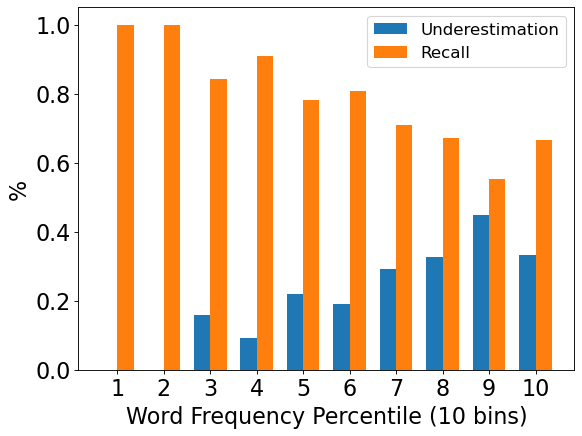

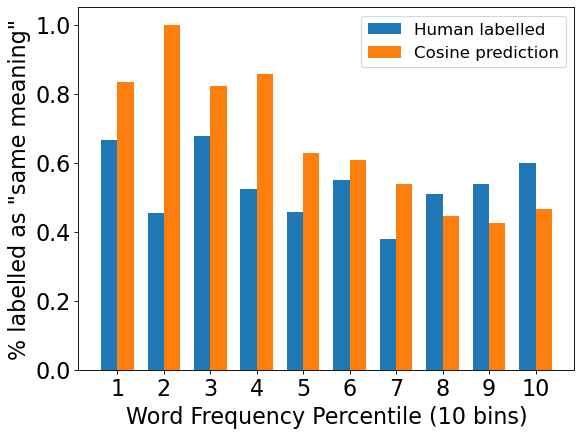

In [107]:
label_bin_default, predict_bin_default = bin_prediction(test, adjust = 'None', no_bin = 10)
plot_under(label_bin_default, predict_bin_default, title='default BERT')

## Adjusted BERT

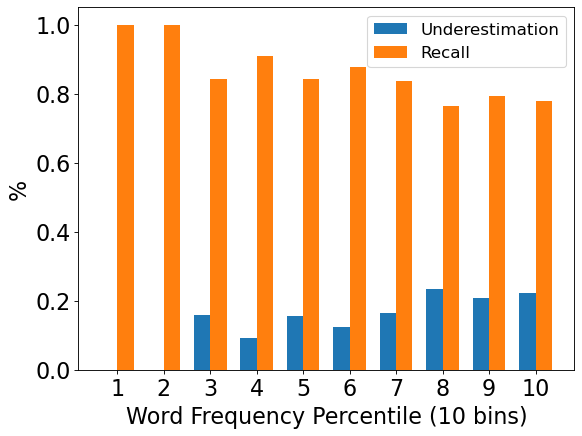

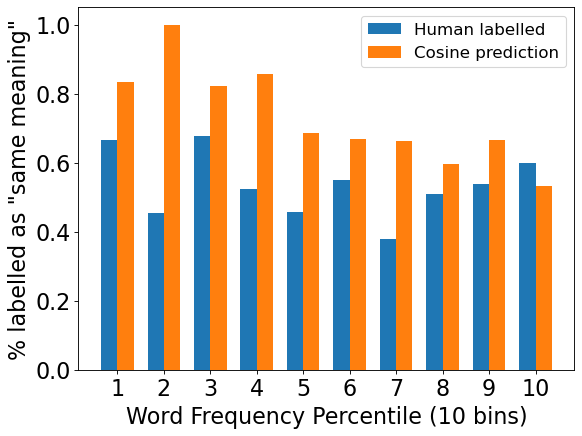

In [108]:
label_bin_adjusted, predict_bin_adjusted = bin_prediction(test, adjust = 'word-type-dependent', no_bin = 10, 
                                                          m1=m1_avg, 
                                                          b1=b1_avg,
                                                          m2=m2_avg,
                                                          b2=b2_avg)
plot_under(label_bin_adjusted, predict_bin_adjusted, title='adjusted BERT')

## Comparison

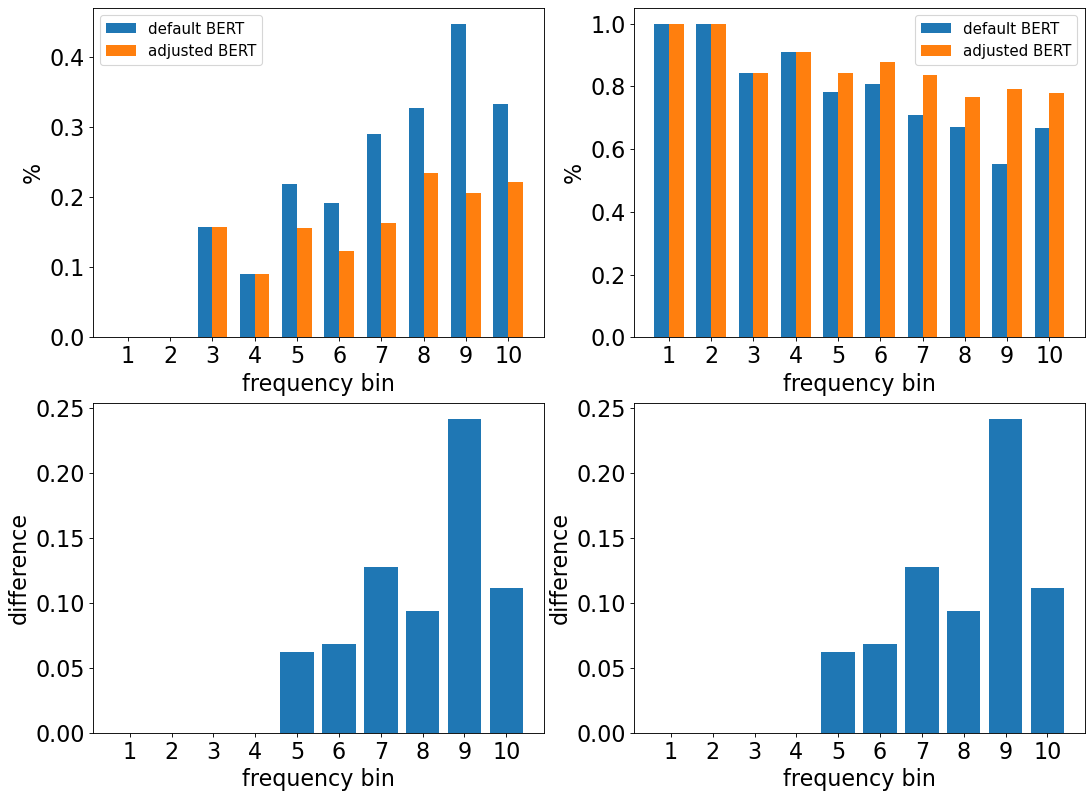


Cosine similarity underestimation (default, adjusted):  (0.253, 0.163)
% cosine similarity underestimation improvement:  35.443 %
Recall (default, adjusted):  (0.747, 0.837)
% recall improvement:  12.017 %
Accuracy (default, adjusted):  (0.667, 0.656)
% accuracy improvement:  -1.667 %



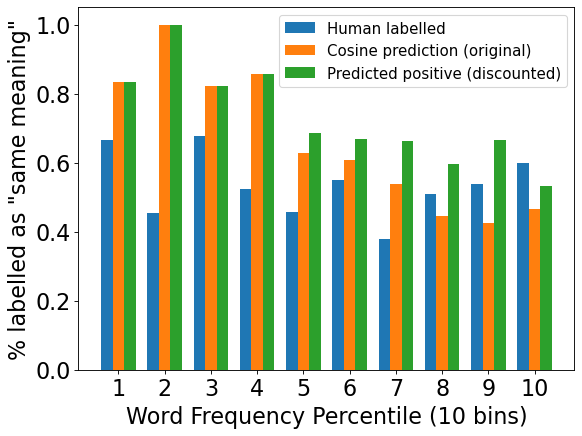

In [116]:
comparison_plot(label_bin_default, predict_bin_default, label_bin_adjusted, predict_bin_adjusted)

## cf_matrix of default BERT

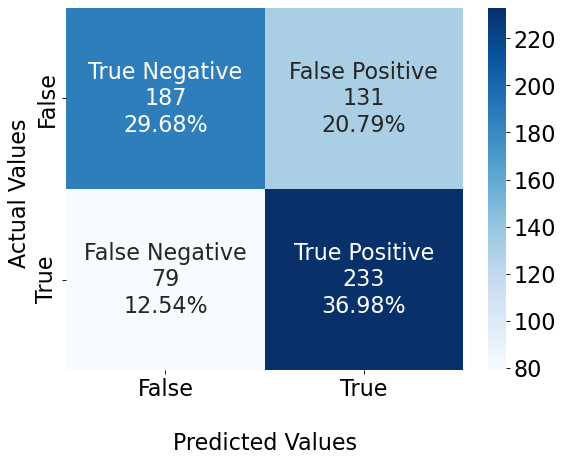

Overall cosine similarity underestimation:  0.253
Overall recall:  0.747
Overall accuracy:  0.6667


In [117]:
total_label_bin = [item for sublist in label_bin_default for item in sublist]
total_predict_bin = [item for sublist in predict_bin_default for item in sublist]
cf_matrix = confusion_matrix(total_label_bin, total_predict_bin)
plot_confusion(cf_matrix)

## cf_matrix of adjusted BERT

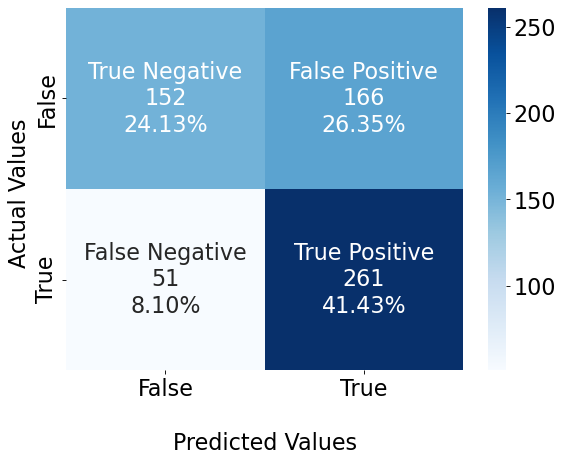

Overall cosine similarity underestimation:  0.163
Overall recall:  0.837
Overall accuracy:  0.6556


In [118]:
total_label_bin = [item for sublist in label_bin_adjusted for item in sublist]
total_predict_bin = [item for sublist in predict_bin_adjusted for item in sublist]
cf_matrix = confusion_matrix(total_label_bin, total_predict_bin)
plot_confusion(cf_matrix, title='Confusion matrix of adjusted BERT\n\n')

## loss comparison

In [77]:
# loss comparison
# default BERT
m1=0
b1=15
m2=0
b2=15
default_loss = linear_score(test, m1, b1, m2,b2)
default_loss

7.800827944970679

In [78]:
# adjust BERT loss
adjusted_loss = linear_score(test, m1=m1_avg, b1=b1_avg, m2=m2_avg, b2=b2_avg)
adjusted_loss

8.530955769461334

In [79]:
# percent improvement
print('% loss improvement: ', 100*((-default_loss+adjusted_loss)/default_loss))

% loss improvement:  9.359619640904656


## cosine similarity of adjusted BERT plot

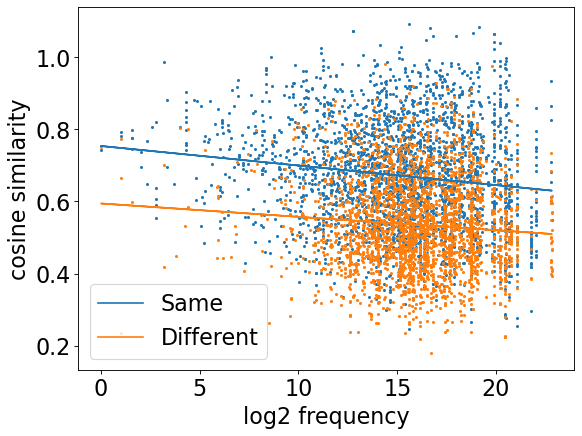

Same meaning stats: 
The Pearson correlation coefficient: -0.136646
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=-0.12922424678218428, pvalue=1.5450686876463003e-11)
slope:  -0.0054123273949927535 (cosine similarity/log2-frequency)
##################################################
Different meaning stats: 
The Pearson correlation coefficient: -0.084368
The p-value (<0.05 to reject null hypothesis): 0.000011
SpearmanrResult(correlation=-0.0676273080919916, pvalue=0.0004257597381458358)
slope:  -0.0037021352095303775 (cosine similarity/log2-frequency)


In [80]:
cosine_sim_plot(train, adjust = 'word-type-dependent', title = 'Cosine similarity plot of adjusted BERT',
                m1=m1_avg,
                b1=b1_avg,
                m2=m2_avg,
                b2=b2_avg)

## cosine similarity comparison plot

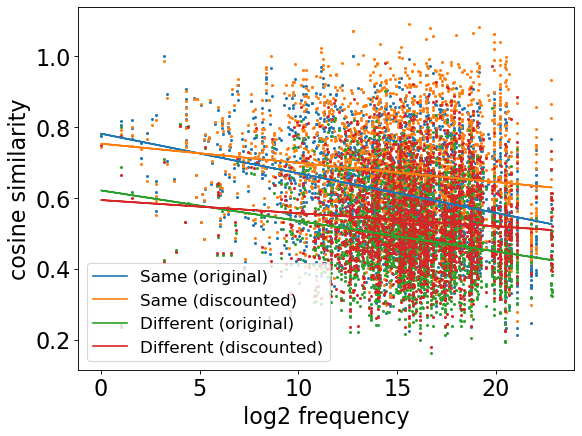

Same meaning stats (default): 
The Pearson correlation coefficient: -0.300086
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=-0.27353553049681806, pvalue=1.3633951570180686e-47)
slope:  -0.011193863182394372 (cosine similarity/log2-frequency)
##################################################
Different meaning stats (default): 
The Pearson correlation coefficient: -0.212538
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=-0.18568002883442905, pvalue=1.8762189241520593e-22)
slope:  -0.008618049895546273 (cosine similarity/log2-frequency)
##################################################
##################################################
Same meaning stats (adjusted): 
The Pearson correlation coefficient: -0.136646
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=-0.12922424678218428, pvalue=1.5450686876463003e-11)
slope:  -0.0054123273949927535 (cosine similarity/log2-frequency)


In [86]:
cosine_sim_same_plot(train, title = 'Cosine similarity plot of default BERT and adjusted BERT', m1=m1_avg, b1=b1_avg, m2=m2_avg, b2=b2_avg)

# Most similar words before and after applying the adjustment

In [14]:
# find the most cos(adjusted) - cos(default) of pairs of words
# from WiC testdataset

# find avg embedding of each unique record (word, pos) in WiC testdataset
rec = dict() # keys = (word, pos, log2 freq) , values = [emb freq, sum emb]
for index in range(len(test)):
    emb1 = np.array([float(i) for i in test.iloc[index]['emb1'][1:-2].split(',')])
    emb2 = np.array([float(i) for i in test.iloc[index]['emb2'][1:-2].split(',')])
    if (test.iloc[index]['keyword'], test.iloc[index]['POS'], test.iloc[index]['log2freq']) not in rec.keys():
        rec[(test.iloc[index]['keyword'], test.iloc[index]['POS']), test.iloc[index]['log2freq']] = [2, emb1+emb2]
    else:
        rec[(test.iloc[index]['keyword'], test.iloc[index]['POS']), test.iloc[index]['log2freq']][0]+=2
        rec[(test.iloc[index]['keyword'], test.iloc[index]['POS']), test.iloc[index]['log2freq']][1]+=emb1
        rec[(test.iloc[index]['keyword'], test.iloc[index]['POS']), test.iloc[index]['log2freq']][1]+=emb2
len(rec)

606

In [15]:
# calculate cosine similarity
def cosine_sim(emb1, emb2):
    dot = np.dot(emb1, emb2)
    norm1 = np.linalg.norm(emb1)
    norm2 = np.linalg.norm(emb2)
    return dot/(norm1*norm2)

In [16]:
emb1 = np.array([float(i) for i in test.iloc[4]['emb1'][1:-2].split(',')])
emb2 = np.array([float(i) for i in test.iloc[4]['emb2'][1:-2].split(',')])
cosine_sim(emb1, emb2)

0.8225123390289654

In [17]:
# creat array of all cosine similarity pairs
all_key = list(rec.keys())
default_cosine = np.zeros((len(all_key),len(all_key)))
for index_row in range(len(all_key)):
    for index_column in range(len(all_key)):
        emb1 = rec[all_key[index_row]][1]/rec[all_key[index_row]][0] # sum(embs)/ len(embs)
        emb2 = rec[all_key[index_column]][1]/rec[all_key[index_column]][0]
        default_cosine[index_row][index_column] = cosine_sim(emb1, emb2)

In [18]:
default_cosine[502][502]

1.0

In [19]:
default_cosine[502][50]

0.4517854017384296

In [20]:
# calculate adjusted cosine similarity
def cosine_sim_adjusted(emb1, emb2, target_word1, target_word2, freq1, freq2):
    dot = np.dot(emb1, emb2)
    if target_word1 not in gensim.parsing.preprocessing.STOPWORDS: # non-stop word
        alpha1 = 1+m1_avg*(b1_avg-freq1)
    else:
        alpha1 = 1+m2_avg*(b2_avg-freq1)
    if target_word2 not in gensim.parsing.preprocessing.STOPWORDS: # non-stop word
        alpha2 = 1+m1_avg*(b1_avg-freq2)
    else:
        alpha2 = 1+m2_avg*(b2_avg-freq2)
    norm1 = np.linalg.norm(emb1)*alpha1
    norm2 = np.linalg.norm(emb2)*alpha2
    return dot/(norm1*norm2)

In [22]:
adjusted_cosine = np.zeros((len(all_key),len(all_key)))
for index_row in range(len(all_key)):
    for index_column in range(len(all_key)):
        emb1 = rec[all_key[index_row]][1]/rec[all_key[index_row]][0]
        emb2 = rec[all_key[index_column]][1]/rec[all_key[index_column]][0]
        target_word1 = all_key[index_row][0][0]
        target_word2 = all_key[index_column][0][0]
        freq1 = all_key[index_row][1]
        freq2 = all_key[index_column][1]
        adjusted_cosine[index_row][index_column] = cosine_sim_adjusted(emb1, emb2, target_word1, target_word2, freq1, freq2)

In [23]:
adjusted_cosine[502][502]

1.1910391534305416

In [24]:
adjusted_cosine[502][50]

0.5138123936774461

In [40]:
# find index of a max value in the column
def max_column_index(index, d_array):
    new_array = d_array.copy()
    new_array[index][index]=0
    return list(new_array[index]).index(max(new_array[index]))

In [41]:
max_column_index(502, default_cosine)

460

In [43]:
max_column_index(502, adjusted_cosine)

239

In [44]:
all_key[0]

(('board', 'N'), 15.318436891437209)

In [60]:
# w, w1, w2, lf(w), lf(w1), lf(w2), sim(w,w1), sim(w,w2)
word = [all_key[i][0][0] for i in range(len(all_key))]
word_pos = [all_key[i][0][1] for i in range(len(all_key))]
log2freq_word = [float("{:.2f}".format(all_key[i][1])) for i in range(len(all_key))]

word_default = [all_key[max_column_index(index, default_cosine)][0][0] for index in range(len(all_key))]
word_default_pos = [all_key[max_column_index(index, default_cosine)][0][1] for index in range(len(all_key))]
log2freq_word_default = [float("{:.2f}".format(all_key[max_column_index(index, default_cosine)][1])) for index in range(len(all_key))]

word_adjusted = [all_key[max_column_index(index, adjusted_cosine)][0][0] for index in range(len(all_key))]
word_adjusted_pos = [all_key[max_column_index(index, adjusted_cosine)][0][1] for index in range(len(all_key))]
log2freq_word_adjusted = [float("{:.2f}".format(all_key[max_column_index(index, adjusted_cosine)][1])) for index in range(len(all_key))]

cosine_default = [float("{:.3f}".format(default_cosine[i][max_column_index(i, default_cosine)])) for i in range(len(all_key))]
cosine_adjusted = [float("{:.3f}".format(adjusted_cosine[i][max_column_index(i, adjusted_cosine)])) for i in range(len(all_key))]
cosine_increase = [float("{:.3f}".format(cosine_adjusted[i]-cosine_default[i])) for i in range(len(all_key))]
percent_increase = [float("{:.3f}".format(100*(cosine_adjusted[i]-cosine_default[i])/cosine_default[i])) for i in range(len(all_key))]

###################################################################
report_cosine = pd.DataFrame()
report_cosine['word']=pd.Series(word)
report_cosine['word_pos']=pd.Series(word_pos)
report_cosine['log2freq_word']=pd.Series(log2freq_word)

report_cosine['word_default']=pd.Series(word_default)
report_cosine['word_default_pos']=pd.Series(word_default_pos)
report_cosine['log2freq_word_default']=pd.Series(log2freq_word_default)

report_cosine['word_adjusted']=pd.Series(word_adjusted)
report_cosine['word_adjusted_pos']=pd.Series(word_adjusted_pos)
report_cosine['log2freq_word_adjusted']=pd.Series(log2freq_word_adjusted)

report_cosine['cosine_default']=pd.Series(cosine_default)
report_cosine['cosine_adjusted']=pd.Series(cosine_adjusted)
report_cosine['cosine_increase']=pd.Series(cosine_increase)
report_cosine['percent_increase']=pd.Series(percent_increase)
report_cosine

,word,word_pos,log2freq_word,word_default,word_default_pos,log2freq_word_default,word_adjusted,word_adjusted_pos,log2freq_word_adjusted,cosine_default,cosine_adjusted,cosine_increase,percent_increase
0,board,N,15.32,piece,N,16.48,piece,N,16.48,0.559,0.616,0.057,10.197
1,circulate,V,9.04,accumulate,V,9.01,accumulate,V,9.01,0.711,0.737,0.026,3.657
2,hook,V,12.42,choke,V,12.69,choke,V,12.69,0.688,0.736,0.048,6.977
3,recreation,N,9.81,activity,N,13.88,activity,N,13.88,0.599,0.637,0.038,6.344
4,domesticity,N,7.75,sexualize,V,3.32,sexualize,V,3.32,0.607,0.611,0.004,0.659
...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,base,N,15.36,surface,N,15.75,surface,N,15.75,0.503,0.552,0.049,9.742
602,power,N,17.42,authority,N,13.90,terror,N,14.73,0.580,0.638,0.058,10.000
603,portmanteau,N,6.38,cognate,N,3.32,cognate,N,3.32,0.625,0.625,0.000,0.000
604,promise,V,14.72,swear,V,14.19,swear,V,14.19,0.599,0.651,0.052,8.681


In [61]:
report_cosine = report_cosine.sort_values(by=['percent_increase'], ascending=False).reset_index(drop=True)
report_cosine[:20]

,word,word_pos,log2freq_word,word_default,word_default_pos,log2freq_word_default,word_adjusted,word_adjusted_pos,log2freq_word_adjusted,cosine_default,cosine_adjusted,cosine_increase,percent_increase
0,go,V,20.07,last,V,19.18,last,V,19.18,0.564,0.667,0.103,18.262
1,part,N,18.19,way,N,20.25,way,N,20.25,0.525,0.607,0.082,15.619
2,way,N,20.25,part,N,18.19,part,N,18.19,0.525,0.607,0.082,15.619
3,middle,N,16.52,go,V,20.07,go,V,20.07,0.472,0.542,0.070,14.831
4,leave,V,18.25,seem,V,16.93,seem,V,16.93,0.626,0.713,0.087,13.898
5,want,V,19.92,need,V,18.85,need,V,18.85,0.613,0.697,0.084,13.703
6,need,V,18.85,want,V,19.92,want,V,19.92,0.613,0.697,0.084,13.703
7,keep,V,18.69,buy,V,15.63,buy,V,15.63,0.639,0.726,0.087,13.615
8,catch,V,16.31,finalize,V,9.22,get,V,20.48,0.575,0.653,0.078,13.565
9,fight,N,16.01,fire,N,17.57,fire,N,17.57,0.579,0.654,0.075,12.953


In [62]:
report_cosine.to_csv('sorted_cosine_V2.csv', index=False)